<a href="https://colab.research.google.com/github/Ayushk249/Machine-Learning-notebooks/blob/main/Bootstrap_Aggregation_Bagging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Notebooks/churn_prediction_simple.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [ ]:
X=data.drop(columns=["customer_id","churn"])
Y=data["churn"]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test=tts(x_scaled,Y,test_size=0.2,stratify=Y,random_state=101)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((17653, 19), (4414, 19), (17653,), (4414,))

# **Model Building, Bagging Logistic Regression**

In [ ]:
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.linear_model import LogisticRegression as LR
classifier=BC(base_estimator=LR(),
              n_estimators=150,
              n_jobs=4,
              random_state=42)
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_train)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(predicted_values,y_train))

              precision    recall  f1-score   support

           0       0.99      0.82      0.90     17282
           1       0.08      0.75      0.15       371

    accuracy                           0.82     17653
   macro avg       0.54      0.78      0.52     17653
weighted avg       0.97      0.82      0.88     17653



In [ ]:
predict=classifier.predict(x_test)
print(classification_report(predict,y_test))
# f1 score is very low need to perform feature transformation and feature engineering

              precision    recall  f1-score   support

           0       0.99      0.82      0.90      4315
           1       0.09      0.78      0.16        99

    accuracy                           0.82      4414
   macro avg       0.54      0.80      0.53      4414
weighted avg       0.97      0.82      0.88      4414



# **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RFC
classifier=RFC(
              n_estimators=150,
              n_jobs=4,
              random_state=42)

In [ ]:
classifier.fit(x_train,y_train)
predict=classifier.predict(x_train)
predict_test=classifier.predict(x_test)
print(classification_report(y_train,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14234
           1       1.00      1.00      1.00      3419

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653



In [ ]:
print(classification_report(y_test,predict_test))
# previously we had f1 score of 0.45 but now it is 0.55. So random Forest gives some edge over individual decision trees

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      3559
           1       0.71      0.45      0.55       855

    accuracy                           0.86      4414
   macro avg       0.79      0.70      0.73      4414
weighted avg       0.85      0.86      0.85      4414



# **Hyperparameter Tuning of random forest**

In [ ]:
from sklearn.metrics import f1_score
def calc_score(model,x1,y1,x2,y2):
  model.fit(x1,y1)

  predict=model.predict(x1)
  f1=f1_score(y1,predict)

  predict=model.predict(x2)
  f2=f1_score(y2,predict)
  return f1,f2

In [ ]:
def effect(train_score,test_score,x_axis,title):
  plt.figure(figsize=(5,7),dpi=120)
  plt.plot(x_axis,train_score,color="red",label="train_score")
  plt.plot(x_axis,test_score,color="blue",label="test_score")
  plt.ylabel("f1_score")
  plt.legend()
  plt.show()

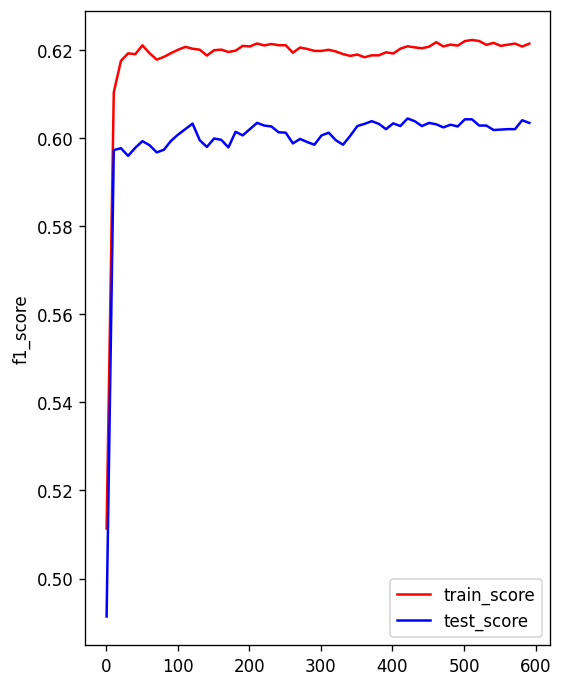

In [ ]:
estimators=[i for i in range(1,600,10)]
train=[]
test=[]
for i in estimators:
  model=RFC(class_weight="balanced_subsample",
            n_estimators=i,
            n_jobs=-1,
            max_depth=7,
            random_state=101)
  f1,f2= calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)
effect(train,test,estimators,"estimator")

ValueError: ignored

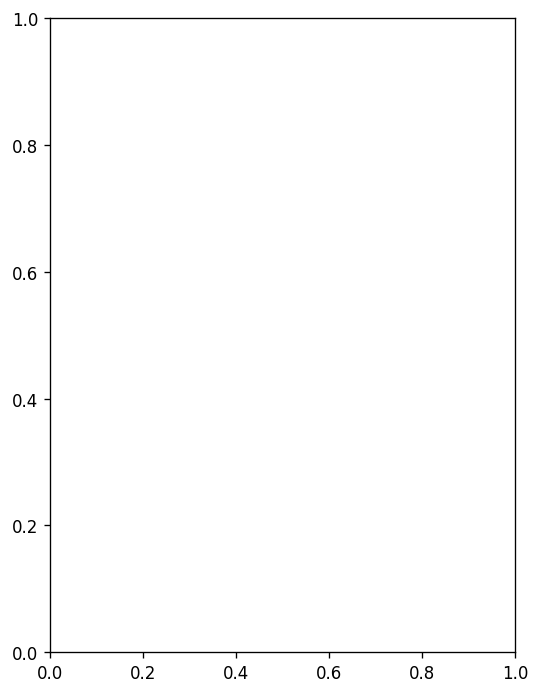

In [ ]:
max_samples=[i/1000 for i in range(1,1000)]
train=[]
test=[]
for i in max_samples:
  model=RFC(class_weight="balanced_subsample",
            n_estimators=50,
            n_jobs=-1,
            max_depth=7,
            max_samples=i,
            random_state=101)
  
  f1,f2= calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)
effect(train,test,max_samples,"estimator")

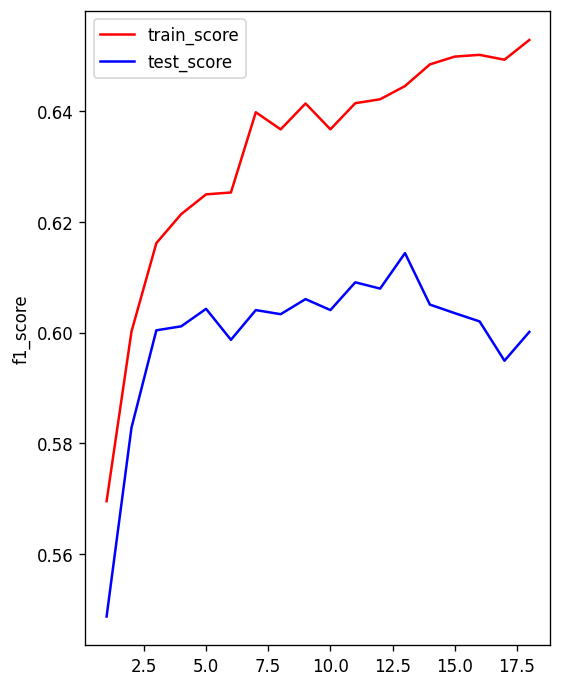

In [ ]:
maxfeatures=[i for i in range(1,X.shape[1])]
train=[]
test=[]
for i in maxfeatures:
  model=RFC(class_weight="balanced_subsample",
            n_estimators=50,
            n_jobs=-1,
            max_depth=7,
            random_state=101,
            max_features=i)
  
  f1,f2= calc_score(model,x_train,y_train,x_test,y_test)
  train.append(f1)
  test.append(f2)
effect(train,test,maxfeatures,"estimator")